<a href="https://colab.research.google.com/github/Shiwei-Chen/DESC-624/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [2]:
url = 'https://raw.githubusercontent.com/Shiwei-Chen/DESC-624/master/breast%20cancer.csv'
df = pd.read_csv(url)
df.drop('id', axis = 1, inplace = True)
df['diagnosis'] = np.where(df['diagnosis']=='M','1','0')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.isnull().sum().any()

False

In [4]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:30], df["diagnosis"], test_size=0.3, random_state=42)
print("Class Counts")
print(y_test.value_counts(), end="\n\n")
print("Class Proportions")
print(y_test.value_counts()/len(y_test))

Class Counts
0    108
1     63
Name: diagnosis, dtype: int64

Class Proportions
0    0.631579
1    0.368421
Name: diagnosis, dtype: float64


In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',fit_intercept=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [11]:
print("Test accuracy (logistic regression) =", 100*lr.score(X_test,y_test), end="% \n\n")

Test accuracy (logistic regression) = 100.0% 



In [0]:
dummy = DummyClassifier(strategy="uniform", constant = 1)
dumb = dummy.fit(X_train,y_train)
dumb_pred = dumb.predict(X_test)
dumb_pred_prob = dumb.predict_proba(X_test)

In [10]:
print("Test accuracy (Dummy Classifier) =", 100*dumb.score(dumb_pred,y_test), end="% \n\n")

Test accuracy (Dummy Classifier) = 53.80116959064327% 



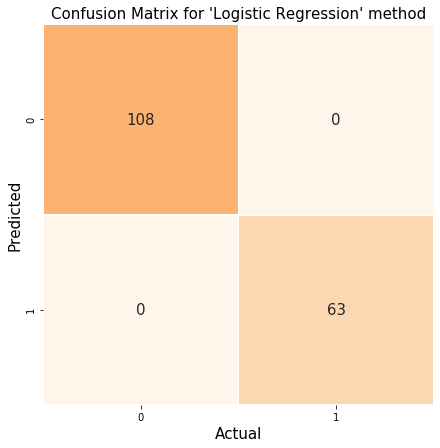

In [14]:
#generate confusion matrix 
cm_lr = confusion_matrix(y_test, y_pred)
#put it into a dataframe for seaborn plot function
cm_lr_df = pd.DataFrame(cm_lr)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_lr_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=300, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
plt.title("Confusion Matrix for 'Logistic Regression' method", fontsize=15)

plt.show()